
## 4章　numpy・pandasの基本

### 4-1 実装：分析のための追加機能のインポート

ライブラリを読み込むと、便利関数やクラスなどを利用できるので、分析がとても簡単になります。

In [1]:
#　以下のコードでライブラリを読み込む。
import numpy as np
import pandas as pd

### 4-3　実装：リスト

In [2]:
sample_list = [1,2,3,4,5]
sample_list
# type(sample_list)

[1, 2, 3, 4, 5]

なお、リストに対する演算は少し工夫が必要です。sample_list + 1のようにリストに1を加えるとエラーになります。
いろいろな計算処理を行う場合は、後ほど紹介するnumpyのアレイやpandasのデータフレームヲ使う方が簡単です。あくまでも使い分けの問題です。リストを使うべき場面もあります。

In [4]:
# これはエラー
sample_list + 1

TypeError: can only concatenate list (not "int") to list

### 4-4　実装：行(Row)・列(Column)

行列に関する用語を説明します。行が横です。列が縦です。行はRowと、列はColumnの頭文字のColと表記することがあります。また行列の名の通り、行番号→列番号の順番で表記されることが多いです。

とてもつまらないことですが、これを間違えるとかなら大きな痛手になるので、ちゃんと対応を把握しておくと安心です。

### 4-5 実装：アレイ

ここからnumpyの解説に移ります。本節ではnumpyのアレイという形式でデータを格納する方法を解説します。リストを用いてアレイを作ります。numpyの機能を用いるので「np.array」とします。

In [3]:
sample_array = np.array([1, 2, 3, 4, 5])
sample_array

array([1, 2, 3, 4, 5])

同一のアレイには、同一のデータの型しか入りません。仮に、数値型と文字列型を同時に入れようとすると、すべてが文字列型として扱われてしまいます。

In [4]:
# すべて文字列型になる
np.array([1 ,2, 'A'])

array(['1', '2', 'A'], dtype='<U21')

### 4-6 実装：アレイに対する演算

アレイに対する演算は、アレイの中身のデータすべてに対して一律に適用されます。例えば足し算ならば、以下のようになります。リストだとエラーになりましたが、アレイなら問題なく実行できます。掛け算も同様です。

In [5]:
sample_array + 1

array([2, 3, 4, 5, 6])

In [6]:
sample_array * 2

array([ 2,  4,  6,  8, 10])

### 4-7　2次元のアレイ

2次元のアレイを作ることもできます。リストを入れ子にしたものを引数に指定します。

In [7]:
# 行列
sample_array_2 = np.array(
    [[1, 2, 3, 4, 5],
     [6, 7, 8, 9, 10]])
sample_array_2

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [8]:
# 行数や列数は以下のようにして取得できます。
# 行数・列数の確認
sample_array_2.shape

(2, 5)

### 4-8 実装：等差数列の作成

アレイを作成する方法は、引数にリストを指定する以外にもさまざまあります。よく使うものをここではいくつか紹介します。

まず等差数列の作成方法を解説します。等差数列とは例えば「1,2,3,4,5」のように前後の数値の差が等しい数列のことです。この例だと右の数値から左の数値を引くと1になります。同様に「0.1,0.3,0.5,0.7」も等差数列です。差分は0.2です。

#### 8-A arrange関数の利用

・まずは「1,2,3,4,5」という、スタートが1で、差分が1の等差数列を作ります。np.arange関数を使います。

・引数は開始位置start、終了位置stop、差分stepです。終了位置は「この位置に来たら終了」ですので、stopの位置はアレイの要素に含まれないことに注意してください。1から5までの数値が欲しいならstopはプラス1をして6とします。

・関数を使う際start=といった引数の名前は省略できます。即ちnp.arange(0.1, 0.8, 0.2)としても結果は変わりません。

In [9]:
# 1から5までの等差数列
np.arange(start=1, stop=6, step=1)

array([1, 2, 3, 4, 5])

In [10]:
np.arange(start=0.1, stop=0.8, step=0.2)

array([0.1, 0.3, 0.5, 0.7])

In [11]:
np.arange(0.1, 0.8, 0.2)

array([0.1, 0.3, 0.5, 0.7])

#### 8-B linespace関数の利用

np.linspace関数を使うことでも等差数列を作れます。np.arange関数は等差数列の差分値を指定しましたが、np.linspace関数は要素の数を指定します。要素の数は決まっている場合は、np.linspace関数を使う方が簡単です。
1から5まで等差数列は以下のようにして作成します。num=5とは5等分するという指示になります。

In [12]:
# 1から5までの等差数列
np.linspace(start=1, stop=5, num=5)

array([1., 2., 3., 4., 5.])

In [13]:
np.linspace(start=1, stop=5, num=11)

array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ])

In [14]:
np.linspace(start=0.1, stop=0.7, num=4)

array([0.1, 0.3, 0.5, 0.7])

### 4-9 実装：様々なアレイの作成

同じ値をたくさん格納したアレイを作る場合はnp.tile関数を使います。例えばAというアルファベットを5個格納した配列を作ります。同じ数値を複数格納することもできます。

In [15]:
# 同じ値の繰り返し
np.tile('A', 5)

array(['A', 'A', 'A', 'A', 'A'], dtype='<U1')

In [16]:
# 0を4回繰り返す
np.tile(0, 4)

array([0, 0, 0, 0])

すべてゼロであるアレイはnp.zeros関数を使うと、より簡単に作成できます。引数にはアレイの要素数を指定します。
2次元のアレイにもできます。要素数は[行数,列数]の順に指定します。
1埋めもできます。np.ones関数を使います。

In [17]:
# ゼロ埋めのアレイ
np.zeros(4)

array([0., 0., 0., 0.])

In [18]:
import numpy as np
# 2次元配列
np.zeros([2,3])

In [19]:
# 1埋めのアレイ
np.ones(3)

array([1., 1., 1.])

In [20]:
np.ones([2,3])

array([[1., 1., 1.],
       [1., 1., 1.]])

In [21]:
# np.twosがない、代わりにnp.full(, 2)を使う
np.full((2, 3), 2)

array([[2, 2, 2],
       [2, 2, 2]])

### 4-10 実装：スライシング

numpyのアレイは、スライシングという技法を使うことで簡単にデータを抽出できます。

#### 10-A 1次元のアレイの事例

・まずは1行のアレイを作ります。以下ではd1_arrayを対象に要素を抽出します。

・データを抽出する場合は角括弧を使います。例えばd1_arrayの最初の要素を取得する場合はd1_array[0]とします。インデックスは0から始まりであることに注意してください。

・複数の要素を抽出する場合は、インデックスをリストで指定します。リストも角括弧を使うので角括弧が連続します。

・範囲を指定して抽出する場合はコロン記号(:)を使うのが便利です。[1:3]のように実装すると、インデックスが1番と2番の要素が取得できます。

In [22]:
# 1次元配列
d1_array = np.array([1, 2, 3, 4, 5])
d1_array

array([1, 2, 3, 4, 5])

In [23]:
# 最初の要素を取得
d1_array[0]

np.int64(1)

In [24]:
# 2~3番目の要素を取得
d1_array[[1, 2]]

array([2, 3])

In [25]:
# 2~3番目の要素を取得
d1_array[1:3]

array([2, 3])

#### 10-B 2次元のアレイの事例

2行以上のアレイでも同様にデータを抽出できます。まずは2次元のアレイを作ります。

In [26]:
# 2次元配列
d2_array = np.array(
    [[1, 2, 3, 4, 5],
     [6, 7, 8, 9, 10]])
d2_array

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

行インデックス・列インデックスの順番に番号を指定することで要素を抽出します。インデックスは0から始まりなので、以下のコードで1行4列目のデータが取得できます。

In [27]:
d2_array[0, 3] #int64 refers to a 64-bit signed integer data type.

np.int64(4)

ここでもコロン記号を使うことで、複数の要素を抽出できます。以下のコードで2行目における3番目と4番目の要素を取得します。

In [28]:
d2_array[1, 2:4]

array([8, 9])

###4-11  実装：データフレーム

ここからはpandasの解説に移ります。本節ではpandasのデータフレームという形式でデータを格納する方法を解説します。

さまざまな作り方がありますが、アレイやリストを使うのが簡単です。中括弧を忘れないように注意してください。

In [29]:
sample_df = pd.DataFrame({
    'col1' : sample_array,
    'col2' : sample_array * 2,
    'col3' : ['A', 'B', 'C', 'D', 'E']
})
print(sample_df)

   col1  col2 col3
0     1     2    A
1     2     4    B
2     3     6    C
3     4     8    D
4     5    10    E


データフレームは列の名称と列に格納するデータを'col1':sample_arrayのように指定します。アレイと異なり、データフレームは、列が異なれば、数値型と文字列型を混在できます。

データフレームを表示させる際print関数を使っていますが、これは必須ではありません。print(sample_df)とせずに単にsample_dfと記述してもエラーにはなりません。ただし見た目が少し変わります。

In [30]:
# print関数を使わないで表示
sample_df

,col1,col2,col3
0,1,2,A
1,2,4,B
2,3,6,C
3,4,8,D
4,5,10,E


### 4-12 実装：ファイルデータの読み込み

データフレームは、自分で作ることもありますが、外部のデータを読み込む際にもしばしば使われます。

調査データなどがCSVファイルで保存されており、作業中のフォルダに格納されている場合は、以下のようにしてデータを読み込むことができます。

データを格納する変数名 = pd.read_csv("ファイル名")

今回は「2-4-1-sample_data.csv」というファイルを読み込みます。なお、このデータは本書サポートページからダウンロードできます。読み込まれたデータは、データフレームとなっています。

Jupyter Notebook環境では直接pd.read_csv('2-4-1-sample_data.csv')の一行コードでデータファイルを読み込みますが、Colaboratoryの環境でfiles.upload()、データファイルをアップロード、とio.BytesIO(uploaded['2-4-1-sample_data.csv'])が前準備として必要となります。

In [31]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()

Saving 2-4-1-sample_data.csv to 2-4-1-sample_data.csv


In [32]:
import io
data = io.BytesIO(uploaded['2-4-1-sample_data.csv'])

In [33]:
import pandas as pd

file_data = pd.read_csv(data)
print(file_data)

   col1 col2
0     1    A
1     2    A
2     3    B
3     4    B
4     5    C
5     6    C


### 4-14 実装：データフレームの結合

作成されたデータフレームを結合して、新たなデータフレームを作ることができます。

まずはデータフレームを2つ作ります。各々3行2列です。

In [34]:
df_1 = pd.DataFrame({
    'col1' : np.array([1, 2, 3]),
    'col2' : np.array(['A', 'B', 'C'])
})
df_2 = pd.DataFrame({
    'col1' : np.array([4, 5, 6]),
    'col2' : np.array(['D', 'E', 'F'])
})

In [35]:
# 縦に結合
print(pd.concat([df_1, df_2]))

   col1 col2
0     1    A
1     2    B
2     3    C
0     4    D
1     5    E
2     6    F


In [36]:
# 横に結合、axis=1という引数を追加、axis=0は行方向、axis=1は列方向を指定、デフォルトは0
print(pd.concat([df_1, df_2], axis=1))

   col1 col2  col1 col2
0     1    A     4    D
1     2    B     5    E
2     3    C     6    F


### 4-14 実装：特定の列の取得

データフレームは、データの抽出等の操作を柔軟に行えます。よく使うものをここでは紹介します。

In [37]:
# 対象データ
print(sample_df)

   col1  col2 col3
0     1     2    A
1     2     4    B
2     3     6    C
3     4     8    D
4     5    10    E


In [38]:
# 列名を指定して抽出、ドット記号を使う。
print(sample_df.col2)

0     2
1     4
2     6
3     8
4    10
Name: col2, dtype: int64


In [39]:
# 列名を指定して抽出、角括弧を使う方法
print(sample_df['col2'])

0     2
1     4
2     6
3     8
4    10
Name: col2, dtype: int64


In [40]:
# 複数列を指定して抽出、列名を指定する角括弧の中にリスト形式で列名を複数指定。
print(sample_df[['col2', 'col3']])

   col2 col3
0     2    A
1     4    B
2     6    C
3     8    D
4    10    E


In [41]:
# 列の削除、drop関数を使う。
print(sample_df.drop('col1', axis=1))

   col2 col3
0     2    A
1     4    B
2     6    C
3     8    D
4    10    E


In [42]:
# 行の削除、drop関数を使う。
print(sample_df.drop(1, axis=0))

   col1  col2 col3
0     1     2    A
2     3     6    C
3     4     8    D
4     5    10    E


### 4-15 実装：特定の行の取得

特定の行を取得するいくつかの方法を紹介します。

In [43]:
# 最初の3行だけを抽出
print(sample_df.head(n=3))

   col1  col2 col3
0     1     2    A
1     2     4    B
2     3     6    C


In [44]:
# 最初の5行だけを抽出
print(sample_df.head())

   col1  col2 col3
0     1     2    A
1     2     4    B
2     3     6    C
3     4     8    D
4     5    10    E


In [45]:
# 最初の行を抽出
print(sample_df.query('index == 0'))

   col1  col2 col3
0     1     2    A


In [46]:
# さまざまな条件で抽出：col3という列の値がAである行のみを抽出します。
print(sample_df.query('col3 == "A"'))

   col1  col2 col3
0     1     2    A


ダブルクォーテーションとシングルクォーテーションの使い分けに注意してください。今回は「文字列A」を、ダブルクォーテーションを使って"A"と指定しました。ここで、抽出条件も文字列として指定する必要があります。ここでもダブルクォーテーションを使ってしまうと、ダブルクォーテーションが4つ搭乗することになり、区切りが分からなくなります。そのため、抽出条件「col3="A"」はシングルクォーテーションで囲っています。

複数の条件を指定する方法を解説します。query('col3 == "A" | col3 == "D"')とすると、「col3がAまたはD」であるという条件で抽出できます。”または”の条件はOR条件とも呼ばれます。

In [47]:
# OR条件で抽出
print(sample_df.query('col3 == "A" | col3 == "D"'))

   col1  col2 col3
0     1     2    A
3     4     8    D


query('col3 == "A" & col1 == 3')とすると、「col3がAであり、且つ、col1が3である」という条件で抽出できます。”かつ”の条件はAND条件とも呼ばれます。今回のデータではこの条件に合致する行はありません。

In [48]:
# AND条件で抽出
print(sample_df.query('col3 == "A" & col1 == 3'))

Empty DataFrame
Columns: [col1, col2, col3]
Index: []


In [49]:
# 行も列も選択する
print(sample_df.query('col3 == "A"')[['col2', 'col3']])

   col2 col3
0     2    A


### 4-16 実装：シリーズ

pandasデータフレームの1列だけを抽出したものは、シリーズと呼ばれる別のデータの型に変わります。

まずはtype関数を使ってsample_dfのクラス名がDataFrameになっていることを確認します。次は1列だけを抽出した結果のクラス名を調べてみます。Seriesに変わっています。

In [50]:
type(sample_df)

pandas.core.frame.DataFrame

In [51]:
type(sample_df.col1)

pandas.core.series.Series

In [52]:
sample_df.col1

,col1
0,1
1,2
2,3
3,4
4,5


In [53]:
sample_df.col3 #データ型がint64, float64, or datetime64以外の場合はdtype: object

,col3
0,A
1,B
2,C
3,D
4,E


1列だけを抽出すると勝手にシリーズ形式になるため、分析をしているとしばしばシリーズ型が登場します。

シリーズはアレイとほぼ同様に扱えるものの、アレイの方が行列演算を簡単に実行できるなど若干の違いがあります。シリーズをアレイに変換する場合はnp.arrayの引数にシリーズを入れます。または、シリーズの後ろに.to_numpy()とつけることでも、アレイとして扱えます。

In [54]:
# アレイへの変換
type(np.array(sample_df.col1))

numpy.ndarray

In [55]:
# アレイへの変換
type(sample_df.col1.to_numpy())

numpy.ndarray

### 4-17 実装：関数のヘルプ

関数の使い方をすべて覚えるのは大変です。Pythonには便利なヘルプ関数が容易されています。query関数の場合は、以下のコードを実行すると、関数の使い方が表示されます。英語ではありますが、実行例が載っていることもあるので、参考になることが多いと思います。

In [59]:
help(sample_df.query)

Help on method query in module pandas.core.frame:

query(expr: 'str', *, inplace: 'bool' = False, **kwargs) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Query the columns of a DataFrame with a boolean expression.
    
    Parameters
    ----------
    expr : str
        The query string to evaluate.
    
        You can refer to variables
        in the environment by prefixing them with an '@' character like
        ``@a + b``.
    
        You can refer to column names that are not valid Python variable names
        by surrounding them in backticks. Thus, column names containing spaces
        or punctuations (besides underscores) or starting with digits must be
        surrounded by backticks. (For example, a column named "Area (cm^2)" would
        be referenced as ```Area (cm^2)```). Column names which are Python keywords
        (like "list", "for", "import", etc) cannot be used.
    
        For example, if one of your columns is called ``a a`` and y

# 第3部　記述統計


## 3章　度数分布

### 3-4 実装：分析の準備

Pythonを利用して、実際に度数分布を求めます。まずは必要なライブラリの読み込みなどを行います。

In [56]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd

### 3-5 実装：度数分布

In [57]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

#### 5-A カテゴリーデータの度数分布

カテゴリーデータに対して度数分布を求めます。対照となるデータを読み込みます。魚の種類名が記録されたデータです。

In [58]:
from google.colab import files
uploaded = files.upload()

Saving 3-3-1-fish-species.csv to 3-3-1-fish-species.csv


In [60]:
# データの読み込み
import io
category_data = pd.read_csv(io.BytesIO(uploaded['3-3-1-fish-species.csv']))
print(category_data)

  species
0       A
1       A
2       A
3       B
4       B
5       B
6       B
7       B
8       B
9       B


In [61]:
# カテゴリーデータの度数分布、pandasのvalue_counts関数を使う。
category_data.species.value_counts(sort=False)

,count
species,
A,3
B,7


データフレームであるcategory_dataからspecies列のみを抽出した結果はシリーズ型になるのでした。これに対してvalue_counts関数を適用します。sort=Falseを指定することで、度数の順に並び替えられるのを防いでいます。

In [63]:
new_row1 ={'species': "C",'species': "C",'species':"C",'species':"C"}
print(type(new_row1))
print(new_row1)

<class 'dict'>
{'species': 'C'}


In [64]:
new_row1 ={'species': ["C","C","C","C"]}
print(type(new_row1))
print(pd.DataFrame(new_row1))

<class 'dict'>
  species
0       C
1       C
2       C
3       C


In [62]:
print(type(category_data))
# print(category_data)

# create new rows by list
new_row = [{'species': "C"},{'species': "C"},{'species':"C"},{'species':"C"}]
print(type(new_row))
print(pd.DataFrame(new_row))

new_row1 ={'species': "C",'species': "C",'species':"C",'species':"C"}
print(type(new_row1))
print(new_row1)

# create new rows by dictionary
new_row1 ={'species': ["C","C","C","C"]}
print(type(new_row1))
print(pd.DataFrame(new_row1))

category_data= pd.concat([category_data,pd.DataFrame(new_row)], axis=0)
print(category_data)

category_data.species.value_counts(sort=False) #ここはsort=Trueの場合どうなるかを試してください。

<class 'pandas.core.frame.DataFrame'>
<class 'list'>
  species
0       C
1       C
2       C
3       C
<class 'dict'>
{'species': 'C'}
<class 'dict'>
  species
0       C
1       C
2       C
3       C
  species
0       A
1       A
2       A
3       B
4       B
5       B
6       B
7       B
8       B
9       B
0       C
1       C
2       C
3       C


,count
species,
A,3
B,7
C,4


In [65]:
category_data.species.value_counts(sort=True) #「高い順」或いは「降順」で並び替える

,count
species,
B,7
C,4
A,3


#### 5-B 数量データの度数分布

数量データに対して度数分布を求めます。対照となるデータを読み込みます。魚の体長が記録されたデータです。

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 3-3-2-fish-length.csv to 3-3-2-fish-length.csv


In [ ]:
import io
# データの読み込み
numeric_data = pd.read_csv(io.BytesIO(uploaded['3-3-2-fish-length.csv']))
print(numeric_data)

   length
0    1.91
1    1.21
2    2.28
3    1.01
4    1.00
5    4.50
6    1.96
7    0.72
8    3.67
9    2.55


In [ ]:
# 数量データの度数分布（うまくいかない例）
numeric_data.length.value_counts()

,count
length,
1.91,1
1.21,1
2.28,1
1.01,1
1.00,1
4.50,1
1.96,1
0.72,1
3.67,1


サンプルサイズは小さいので、value_counts関数を使うと、同じ数値は存在しません。この場合、以下のようにbins=3と指定することで、データを3つに区切ったうえで、度数を得ることができます。

In [ ]:
# 数量データの度数分布(3区分)
numeric_data.length.value_counts(bins=3)

,count
"(0.715, 1.98]",6
"(1.98, 3.24]",2
"(3.24, 4.5]",2


0.715より大きく、1.98以下であるデータは6個あることが分かります。1.98より大きく、3.24以下であるデータは2個あります。3.24より大きく、4.5以下であるデータも2個あります。「下限は含まないが、上限は含む」というルールで数えていることに注意してください。

階級の下限と上限を直接与えることもできます。例えば、以下のように0から5までの等差数列として階級を与えるとします。

In [ ]:
# 階級の上限と下限
np.arange(0, 6, 1)

array([0, 1, 2, 3, 4, 5])

この階級を以下のようにbinsに指定することで、度数が得られます。結果を後で使いまわせるように、度数分布をfreqという名前で保存しました。

In [ ]:
# 数量データの度数分布(階級の上限と下限を指定)
freq = numeric_data.length.value_counts(
    bins=np.arange(0, 6, 1), sort=False)
freq

,count
"(-0.001, 1.0]",2
"(1.0, 2.0]",4
"(2.0, 3.0]",2
"(3.0, 4.0]",1
"(4.0, 5.0]",1


#### 5-C numpyの関数を使う

別の方法で度数分布を得ることができます。np.histogramを使います。まずはデータを3区分に分けて度数を得ます。

In [ ]:
# 数量データの度数分布(3区分)
np.histogram(numeric_data.length, bins=3)

(array([6, 2, 2]), array([0.72, 1.98, 3.24, 4.5 ]))

出力は2つのアレイです。1つ目のアレイであるarray([6, 2, 2], dtype=int64)は度数を表します。

2つ目のアレイであるarray([0.72, 1.98, 3.24, 4.5 ])は、階級の下限と上限の一覧を表します。

In [ ]:
# 参考：度数だけを取得した結果(書籍には載っていないコードです)
np.histogram(numeric_data.length, bins=3)[0]

array([6, 2, 2])

binsに階級の上限と下限を指定することもできます。

In [ ]:
# 数量データの度数分布(階級の上限と下限を指定)
# 下限を含み、上限を含まないので注意
np.histogram(numeric_data.length, bins=np.arange(0, 6, 1))

(array([1, 5, 2, 1, 1]), array([0, 1, 2, 3, 4, 5]))

np.histogram関数を使う場合、結果はvalue_counts関数の結果と異なっていることに注意してください。np.histogram関数は下限を含むため、「ちょうど1cm」のデータの取り扱いが変わっています。それ以外はほぼ同様に利用できます。

### 3-7 実装：相対度数分布・累積度数分布

3-5節で計算した魚の体長データの度数であるfreqを対象にして、相対度数分布と累積度数分布を求めます。

#### 7-A 相対度数分布

いくつかの方法があります。

方法（1）まずは定義通り、度数をサンプルサイズで割ることで相対度数を求めます。

In [ ]:
# 相対度数分布
rel_freq = freq / sum(freq)
rel_freq

,count
"(-0.001, 1.0]",0.2
"(1.0, 2.0]",0.4
"(2.0, 3.0]",0.2
"(3.0, 4.0]",0.1
"(4.0, 5.0]",0.1


方法（2）value_counts関数を使う際にnormalize=Trueと設定すると、最初から割合を計算してくれます。

In [ ]:
# value_counts関数の設定を変える
numeric_data.length.value_counts(bins=np.arange(0, 6, 1),
                                 sort=False,
                                 normalize=True)

,proportion
"(-0.001, 1.0]",0.2
"(1.0, 2.0]",0.4
"(2.0, 3.0]",0.2
"(3.0, 4.0]",0.1
"(4.0, 5.0]",0.1


方法（3）np.hinstogram関数を使う場合はdensity=Trueとします。

In [ ]:
# np.hinstogram関数の設定を変える
np.histogram(numeric_data.length, bins=np.arange(0, 6, 1),
             density=True)

(array([0.1, 0.5, 0.2, 0.1, 0.1]), array([0, 1, 2, 3, 4, 5]))

#### 7-B 累積度数分布

累積度数分布を求める際には、累積値を計算するcumsum関数を使います。

In [ ]:
# 累積度数分布
freq.cumsum()

,count
"(-0.001, 1.0]",2
"(1.0, 2.0]",6
"(2.0, 3.0]",8
"(3.0, 4.0]",9
"(4.0, 5.0]",10


np.histogram関数の結果に対しては、要素インデックス[0]を指定して度数だけを取得したうえで、np.cumsum関数を適用します。

In [ ]:
freq_np = np.histogram(numeric_data.length,
                       bins=np.arange(0, 6, 1))[0]
np.cumsum(freq_np)

array([ 1,  6,  8,  9, 10])

#### 7-C 累積相対度数分布

相対度数分布に対して累積値を計算すると、累積相対度数分布が得られます。

In [ ]:
# 累積相対度数分布
rel_freq.cumsum()

,count
"(-0.001, 1.0]",0.2
"(1.0, 2.0]",0.6
"(2.0, 3.0]",0.8
"(3.0, 4.0]",0.9
"(4.0, 5.0]",1.0


### 3-9 グラフ描画とmatplotlib・seaborn

ヒストグラムを描くために、グラフを描くする2つのライブラリを紹介します。以下のようにしてライブラリを読み込みます。

In [ ]:
# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 3

### 3-10 実装：ヒストグラム

本書ではseabornを積極的に使います。ただしseabornはmatplotlibとも相性がよく、matplotlibの機能を使ってグラフを装飾できます。

ヒストグラムを描く関数はseabornの中でもいくつかあります。

#### matplotlibを使う方法(参考)

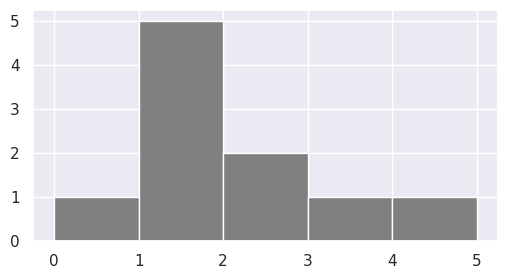

In [ ]:
# 参考：matplotlibを使ったヒストグラム(書籍には載っていないコードです)
hist = plt.hist(x='length', data=numeric_data,
                bins=np.arange(0, 6, 1), color='gray')

#### seabornを使う方法

ここではsns.histplot関数を使います。引数x='length'とdata=numeric_dataで「numeric_dataのlength列」を対象にヒストグラムを描くように指定します。colorでヒストグラムの色を、binsで階級を指定します。

ヒストグラムを見ることで、データの分布が視覚的に分かります。このヒストグラムの縦軸は度数です。0以上1未満のデータは1つだけで、1以上2未満のデータは5つあり…と度数分布と同様に解釈できます。結果はnp.histogram関数の結果と一致します。

<Axes: xlabel='length', ylabel='Count'>

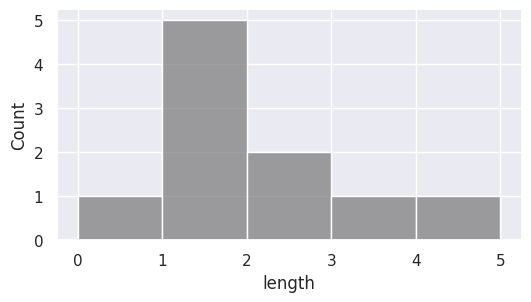

In [ ]:
sns.histplot(x='length', data=numeric_data, color='gray',
             bins=np.arange(0, 6, 1))

ヒストグラムの柱の面積を相対度数とみなせるように標準化した結果を得ることもできます。stat='density'と指定します。

<Axes: xlabel='length', ylabel='Density'>

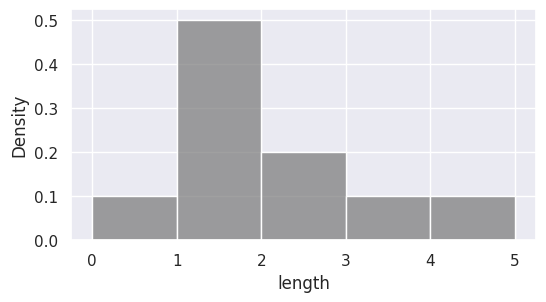

In [ ]:
# 柱の面積を相対度数にする
sns.histplot(x='length', data=numeric_data, color='gray',
             bins=np.arange(0, 6, 1), stat='density')

### 3-11 実装：階級の幅が異なるヒストグラム

今までは階級の幅が常に等しくなるようにbinsを設定しました。しかし、階級の幅は任意に設定できます。もちろん異なる幅にすることもできます。階級を「0以上、1未満」、「1以上、2未満」、「2以上、5未満」と最後の階級だけ長くとった際の度数分布を得ます。

ここで、「2以上、5未満」のデータは4つあるため、本らの相対度数は0.4となるはずです。けれども「2以上、5未満」の階級に属するデータのヒストグラムの柱の高さは0.13333333となりました。

ヒストグラムは、その面積を相対度数として解釈できます。「2以上、5未満」のデータは、全体の40%を占めます。そして「2以上、5未満」という階級におけるヒストグラムの柱の横幅は3です。そのため「柱の高さ*柱の横幅」即ち0.13333333*3とすることで、40%という割合が計算できます。np.histogram関数やsns.histplot関数において、異なる階級の幅を設定した時の挙動はやや複雑ですので注意してください。

In [ ]:
# np.hinstogram関数の設定を変える
np.histogram(numeric_data.length, bins=np.array([0, 1, 2, 5]),
             density=True)

(array([0.1       , 0.5       , 0.13333333]), array([0, 1, 2, 5]))

<Axes: xlabel='length', ylabel='Density'>

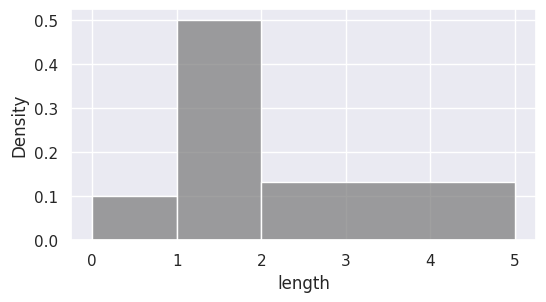

In [ ]:
# 階級の幅を変える
sns.histplot(x='length', data=numeric_data, color='gray',
             bins=np.array([0, 1, 2, 5]), stat='density')

### 3-12 用語：カーネル密度推定によるヒストグラム平滑化

ヒストグラムのとよく似た結果が得られる、カーネル密度推定について解説します。やや高度な内容が含まれます。特に仕組みに関しては、難しいと感じたら飛ばしても大丈夫です。

#### 12-A カーネル密度推定の基本

ヒストグラムのを平滑化するためにカーネル密度推定が用いられます。ヒストグラムは、データの分布が一目でわかる便利なグラフですが、階級ごとに段差が生じます。カーネル密度推定を用いることで、この段差をなくして滑らかな分布を提示できます。

#### 12-B カーネル密度推定の仕組み

下記はnumeric_data.lengthを対象にラグプロットを描いた結果です。横軸が体長です。体長の最小値である0.72や、2番目に小さい値である1.00の位置に縦棒が配置されています。

実現値を中心としたガウス曲線をすべて描きました。最後に、ガウス曲線の値をすべて合計します。この結果がカーネル密度推定の結果となります。こうすることで、データが集中している箇所は、密度が高いと評価されます。

<ipython-input-95-d96006c1ba13>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_data['length'], kde=True, rug=True, hist=False, color='red', bins=np.arange(0, 6, 1))


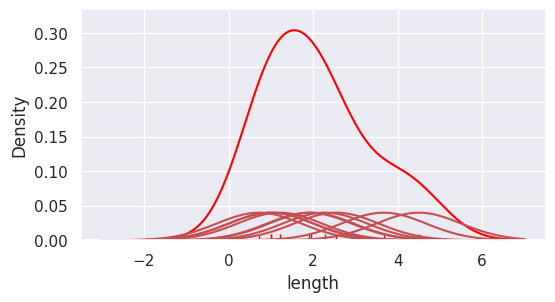

In [ ]:
import scipy
sns.distplot(numeric_data['length'], kde=True, rug=True, hist=False, color='red', bins=np.arange(0, 6, 1))


x_pdf = np.linspace(-3, 7, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, 0.72, 1)
plt.plot(x_pdf, y_pdf/10, c='r')

x_pdf = np.linspace(-3, 7, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, 1.91, 1)
plt.plot(x_pdf, y_pdf/10, c='r')

x_pdf = np.linspace(-3, 7, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, 1.21, 1)
plt.plot(x_pdf, y_pdf/10, c='r')

x_pdf = np.linspace(-3, 7, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, 2.28, 1)
plt.plot(x_pdf, y_pdf/10, c='r')

x_pdf = np.linspace(-3, 7, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, 1.01, 1)
plt.plot(x_pdf, y_pdf/10, c='r')

x_pdf = np.linspace(-3, 7, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, 1.00, 1)
plt.plot(x_pdf, y_pdf/10, c='r')

x_pdf = np.linspace(-3, 7, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, 4.50, 1)
plt.plot(x_pdf, y_pdf/10, c='r')

x_pdf = np.linspace(-3, 7, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, 1.96, 1)
plt.plot(x_pdf, y_pdf/10, c='r')

x_pdf = np.linspace(-3, 7, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, 3.67, 1)
plt.plot(x_pdf, y_pdf/10, c='r')

x_pdf = np.linspace(-3, 7, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, 2.55, 1)
plt.plot(x_pdf, y_pdf/10, c='r')


plt.xlabel('length')
plt.show()

<ipython-input-96-d25a549655f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_data['length'], kde=True, rug=True, hist=False, color='red', bins=np.arange(0, 6, 1))


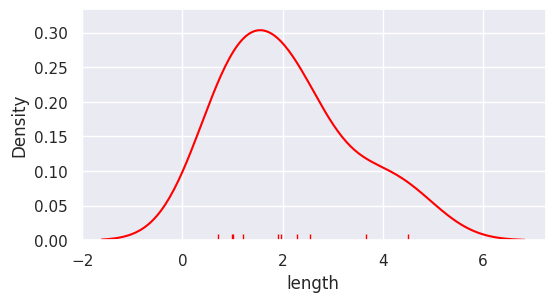

In [ ]:
sns.distplot(numeric_data['length'], kde=True, rug=True, hist=False, color='red', bins=np.arange(0, 6, 1))
plt.xlabel('length')
plt.show()

### 3-13 実装：カーネル密度推定によるヒストグラム平滑化

カーネル密度推定を実行します。

#### 13-A 基本的な実装

seabornのkdeplot関数を使うことで、カーネル密度推定の結果を簡単に得ることができます。fill=Trueとすることで曲線の下側を塗りつぶします。

ヒストグラムと異なり、滑らかな結果が得られます。ただし、体長データにもかかわらず、負の値でも0より大きい密度が得られています。0以上のデータや離散型のデータに対してカーネル密度推定を実行すると、やや直感と異なる結果が得られることもあるので注意してください。このような場合はヒストグラムを用います。

<Axes: xlabel='length', ylabel='Density'>

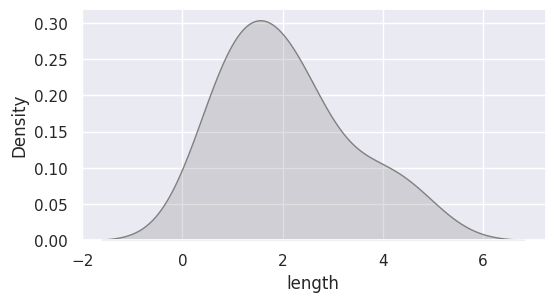

In [ ]:
sns.kdeplot(numeric_data.length, fill=True, color='gray')

#### 13-B バンド幅の変更

参考までにバンド幅を変更した結果を確認します。bw_adjustを小さくすると変動が大きくなります。逆にbw_adjustを大きくすると、滑らかな結果が得られます。

以下はグラフ描画方法の補足です。グラフ描画関数sns.kdeplotを連続で実行することでグラフを上書きしています。linestyleの指定をすることで、線の種類をはせんなどに変更できます。labelを設定した後でplt.legend関数を適用すると凡例を表示できます。

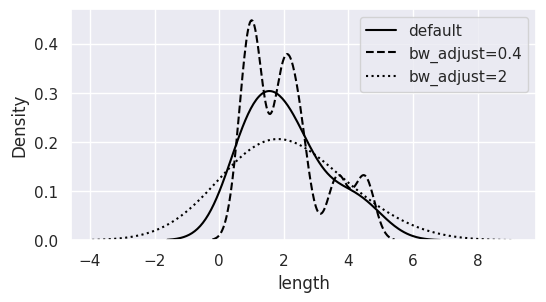

In [ ]:
# バンド幅を変えた3種類のカーネル密度推定の結果
sns.kdeplot(numeric_data.length,
            color='black', label='default')
sns.kdeplot(numeric_data.length,
            color='black', bw_adjust=0.4,
            linestyle='dashed', label='bw_adjust=0.4')
sns.kdeplot(numeric_data.length,
            color='black', bw_adjust=2,
            linestyle='dotted', label='bw_adjust=2')

plt.legend() # 凡例

## 4章　1変量データの統計量

本章では1変量データを対象としたさまざまな統計量を紹介し、Pythonでの実装方法を解説します。

### 4-1 実装：分析の準備

必要なライブラリの読み込みなどを行います。scipyは科学技術計算を行う際に便利なライブラリです。scipyから特に統計処理に特化したstatsモジュールを読み込みました。

In [ ]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd

# 複雑な統計処理を行うライブラリ
from scipy import stats

In [ ]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)

### 4-2 分析対象となるデータの用意

分析対象となるデータを用意します。2通りの方法で同じデータを用意します。

#### 2-A numpyアレイで用意

numpyのアレイでデータを用意します。魚の体長を10個体だけ記録したデータです。名前はfish_lengthとします。

In [70]:
fish_length = np.array([2,3,3,4,4,4,4,5,5,6])
fish_length

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

#### 2-B CSVファイルから読み込み

データはCSVファイルとして保存することが多いと思います。アレイで用意したデータと同じデータを、pandasのデータフレームとして読み込みます。名前は末尾に_dfをつけてfish_length_dfとします。

In [66]:
import io
from google.colab import files
uploaded = files.upload()

Saving 3-4-1-fish-length.csv to 3-4-1-fish-length.csv


In [68]:
# データの読み込み
# fish_length_df = pd.read_csv('3-4-1-fish-length.csv')
fish_length_df = pd.read_csv(io.BytesIO(uploaded['3-4-1-fish-length.csv']))
print(fish_length_df)

   length
0       2
1       3
2       3
3       4
4       4
5       4
6       4
7       5
8       5
9       6


#### 2-C データフレームとアレイの変換

第2部第4章の復習ですが、データフレームをアレイに変換することは難しくありません。1変量の場合は、列名を指定したうえでさらにto_numpy()とつけることでアレイとして扱えます。すなわちfish_length_df.length.to_numpy()はアレイであるfish_lengthと同様に扱えます。これは以下のコードで確認できます。すべての要素がTrueなので、すべて等しいことがわかります。

In [71]:
# データフレームもアレイに変換できる
fish_length_array = fish_length_df.length.to_numpy()
print(fish_length_array)

fish_length_df.length.to_numpy() == fish_length

[2 3 3 4 4 4 4 5 5 6]


array([ True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

### 4-3 実装：サンプルサイズ

標本のサンプルサイズを取得します。len関数を使います。まずはアレイに適用します。10個のデータがあるので結果は10です。

In [ ]:
# サンプルサイズ
len(fish_length)

10

続いてデータフレームに適用します。len関数を使うことで行数が取得できます。

In [72]:
# サンプルサイズ(データフレームの行数)
len(fish_length_df)

10

データフレームはアレイに変換してから処理をしても構いませんし、データフレームのまま処理を実行できることもあります。両方のやり方を知っておくと便利です。しかし、複数のやり方を併記すると混乱を招くかもしれません。本章では、基本的にアレイを対象に実行します。 ただしnumpyとpandasで「同じ名前の関数なのに、処理の結果が異なる」ということもまれにあります。その場合には適宜注意を促します。

### 4-4 実装：合計値

標本の合計値を計算します。いろいろな実装方法があります。本節ではアレイとデータフレームの両方を対象とします。

#### 4-A 基本的な計算方法

合計値を計算するだけでもいろいろな方法があります。読者の方が混乱するのを避けるために、本書ではなるべくnumpyの関数を利用する方法で統一します。必要に応じてscipyのstatsの機能を使います。

numpyの関数を使って合計値を計算する場合はnp.sum関数を使います。まずはアレイを対象に適用します。結果は2+3+3+4+4+4+4+5+5+6=40です。データフレームにも同様に適用できます。

In [ ]:
# 合計
np.sum(fish_length)

np.int64(40)

In [ ]:
# 合計
np.sum(fish_length_df)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
length,40


#### 4-B その他の計算方法

Pythonを扱った教科書によっては以下のような方法が提示されていることもあると思います。結果は変わりませんが、読者の混乱を防ぐために、本書では明示的にnp.sum関数を使う方法を中心に使います。

In [ ]:
# アレイが持つsum関数を実行
fish_length.sum()

np.int64(40)

In [ ]:
# データフレームが持つ関数を実行
fish_length_df.sum()

,0
length,40


### 4-5 実装：標本平均

標本平均を計算します。平均値の計算式を再掲します。ただしは標本$x^̄$の平均値であり、nはサンプルサイズです。

#### 5-A 計算方法の確認

アレイを対象にして、Pythonで平均値を計算します。標本平均を定義通りに実装します。まずはサンプルサイズを取得します。続いて合計値を計算します。合計値をサンプルサイズで除すことで平均値が計算できます。

In [ ]:
# サンプルサイズ
n = len(fish_length)
n

10

In [ ]:
# 合計値
sum_value = np.sum(fish_length)
sum_value

np.int64(40)

In [ ]:
# 平均値の計算
x_bar = sum_value / n
x_bar

np.float64(4.0)

#### 5-B 関数を使った効率的な実装


In [ ]:
# 関数を使った平均値の計算
np.mean(fish_length)

np.float64(4.0)

### 4-7 実装：標本分散

アレイを対象にして標本分散を計算します。

#### 7-A 計算方法の確認

アレイを対象にして標本分散を計算します。

In [ ]:
# 標本分散
s2 = np.sum((fish_length - x_bar) ** 2) / n
s2

np.float64(1.2)

#### 7-B 実装コードの解読

コードがやや複雑なので、順を追って実装コードの解説をします。まずはアレイで用意した魚の体長データxiを確認します。

In [ ]:
fish_length

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [ ]:
fish_length - x_bar

array([-2., -1., -1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.])

In [ ]:
(fish_length - x_bar) ** 2

array([4., 1., 1., 0., 0., 0., 0., 1., 1., 4.])

In [ ]:
np.sum((fish_length - x_bar) ** 2)

np.float64(12.0)

#### 7-B 関数を使った効率的な実装

np.var関数を使うと簡単に計算できます。ただし間違いをなくすためにddof=0という引数は必ず指定してください。ddofという引数の意味は4-9節で解説します。

In [ ]:
# 関数を使った標本分散
np.var(fish_length, ddof=0)

np.float64(1.2)

### 4-7 用語：不偏分散

記述統計で分散と呼ぶ場合は、標本分散s2を指すことが多いです。ただし、本書では第5部以降で推測統計を解説します。推測統計では不偏分散や不偏標本分散と呼ばれる分散を使うことが多いです。不偏分散は以下のようにして計算されます。本書では見分けをつけやすくするため、不偏分散を記号u2と表記します。「不偏」の英語であるunbiasedの頭文字を意図しています。

サンプルサイズではなく、サンプルサイズから1を差し引いたもので除します。 不偏分散を理解するためには、推測統計の考え方を理解する必要があります。そのため現時点で不偏分散について理解できなくても大丈夫です。詳しくは第5部第4章で解説します。ここでは、不偏分散の役割を直観的に紹介するにとどめます。

### 4-9 実装：不偏分散

#### 9-A 計算方法の確認

In [ ]:
# 不偏分散
u2 = np.sum((fish_length - x_bar) ** 2) / (n - 1)
u2

np.float64(1.3333333333333333)

In [ ]:
# 小数点以下第3位で丸める
round(u2, 3)

np.float64(1.333)

#### 9-B 関数を使った効率的な実装

In [ ]:
# 不偏分散
round(np.var(fish_length, ddof=1), 3)

np.float64(1.333)

#### 9-C ライブラリの違いに注意

numpyとpandasでともにvarという関数があり、両者は違うことに注意してください。numpyのvar関数では、ddofを指定しない場合は標本分散を計算する。一方で、pandasのvar関数では、ddofを指定しない場合は不偏分散を計算する。

In [ ]:
# numpy(defaultは標本分散)
np.var(fish_length_df)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,0
length,1.2


In [ ]:
# pandas(defaultは不偏分散)
fish_length_df.var()

,0
length,1.333333


In [ ]:
# ddofを指定
fish_length_df.var(ddof=0)

,0
length,1.2


In [ ]:
# 参考：ライブラリのバージョン(書籍には載っていないコードです)
print('numpyのバージョン', np.__version__)
print('pandasのバージョン', pd.__version__)

### 4-11 実装：標準偏差

#### 11-A 計算方法の確認

In [ ]:
# 標準偏差
s = np.sqrt(s2)
round(s, 3)

np.float64(1.095)

#### 11-B 関数を使った効率的な実装

In [ ]:
# 関数を使った標準偏差
round(np.std(fish_length, ddof=0), 3)

np.float64(1.095)

### 4-12 用語：変動係数

平均値と標準偏差の比を変動係数と呼ぶ。変動係数(coefficient of variation, CV)は下記の式で計算する。計算した結果を100倍にして%表記にすることもあります。

$CV=\frac{s}{x^̄}$

### 4-13 実装：変動係数

#### 13-A 計算方法の確認

In [ ]:
cv = s / x_bar
round(cv, 3)

np.float64(0.274)

#### 13-B 関数を使った効率的な実装

In [ ]:
round(stats.variation(fish_length), 3)

np.float64(0.274)

In [ ]:
# 不偏分散を使った変動係数の計算
round(stats.variation(fish_length, ddof=1), 3)

np.float64(0.289)

In [ ]:
# 参考：不偏分散を使った変動係数の計算(書籍には載っていないコードです)
round(np.sqrt(u2) / x_bar, 3)

np.float64(0.289)

In [ ]:
# 参考：ライブラリのバージョン(書籍には載っていないコードです)
import scipy
print(scipy.__version__)

1.15.3


#### 13-C 変動係数を使う注意点

In [ ]:
# 冬の気温と夏の気温
winter = np.array([1,1,1,2,2,2])
summer = np.array([29,29,29,30,30,30])

In [ ]:
# 標準偏差の比較
print('冬の気温の標準偏差：', np.std(winter, ddof=0))
print('夏の気温の標準偏差：', np.std(summer, ddof=0))

冬の気温の標準偏差： 0.5
夏の気温の標準偏差： 0.5


In [ ]:
# 変動係数の比較
print('冬の気温の変動係数：', round(stats.variation(winter), 3))
print('夏の気温の変動係数：', round(stats.variation(summer), 3))

冬の気温の変動係数： 0.333
夏の気温の変動係数： 0.017


### 4-15 実装：標準化

#### 15-A 計算方法の確認

In [ ]:
z = (fish_length - x_bar) / s
np.round(z, 3)

array([-1.826, -0.913, -0.913,  0.   ,  0.   ,  0.   ,
        0.   ,  0.913,  0.913,  1.826])

In [ ]:
# z得点の平均値はほぼ0
np.mean(z)

np.float64(2.2204460492503132e-17)

In [ ]:
# z得点の標準偏差はほぼ1
np.std(z, ddof=0)

np.float64(1.0)

#### 15-B 関数を使った効率的な実装

In [ ]:
np.round(stats.zscore(fish_length, ddof=0), 3)

array([-1.826, -0.913, -0.913,  0.   ,  0.   ,  0.   ,
        0.   ,  0.913,  0.913,  1.826])

### 4-17 実装：最大値と最小値

In [ ]:
# 最小
np.amin(fish_length)

np.int64(2)

In [ ]:
# 最大
np.amax(fish_length)

np.int64(6)

### 4-18 実装：中央値

#### 18-A 中央値の実装

In [ ]:
# 中央値
np.median(fish_length)

np.float64(4.0)

#### 18-B 平均値と中央値の違い

In [ ]:
# 外れ値のあるデータ
fish_length_2 = np.array([2,3,3,4,4,4,4,5,5,100])

In [ ]:
# 平均値と中央値の比較
print('平均値：', np.mean(fish_length_2))
print('中央値：', np.median(fish_length_2))

平均値： 13.4
中央値： 4.0


### 4-19 実装：四分位点

In [ ]:
print('第1四分位点', np.quantile(fish_length, q=0.25))
print('第3四分位点', np.quantile(fish_length, q=0.75))

第1四分位点 3.25
第3四分位点 4.75


In [ ]:
# 別のデータを利用
fish_length_3 = np.arange(0, 101, 1)
fish_length_3

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100])

In [ ]:
# サンプルサイズ
len(fish_length_3)

101

In [ ]:
print('第1四分位点', np.quantile(fish_length_3, q=0.25))
print('第3四分位点', np.quantile(fish_length_3, q=0.75))

第1四分位点 25.0
第3四分位点 75.0


In [ ]:
# 中央値
print('中央値：', np.median(fish_length_3))
print('50%点 ：', np.quantile(fish_length_3, q=0.5))

中央値： 50.0
50%点 ： 50.0


### 4-20 実装：最頻値

In [ ]:
# 元のデータ
fish_length

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [ ]:
# 最頻値
stats.mode(fish_length)

ModeResult(mode=np.int64(4), count=np.int64(4))

In [ ]:
# 度数が同じなら、小さい値が出力される
stats.mode(np.array([1,1,1,1,2,3,3,3,3]))

ModeResult(mode=np.int64(1), count=np.int64(4))

### 4-21 実装：pandasのdescribe関数の利用

In [ ]:
# 統計量をまとめて算出
print(fish_length_df.describe())

          length
count  10.000000
mean    4.000000
std     1.154701
min     2.000000
25%     3.250000
50%     4.000000
75%     4.750000
max     6.000000
